## (Task 1) Network Construction

We are given two JSON datasets of Actors, info about them, and movies they have starred in. For this task, we will load the JSON files, prep/clean data, and then create an undirected network of nodes and weighted edges to show actors and number of movies they have respectively costarred in. 

<b>Why are we creating a weighted undirected network?</b>

Our goal is to show the relationship of actors and how many movies they have costarred together in. An actor can not costar with another actor in a one-way relationship, so therefore this network should be undirected. Weights in this network represent the number of movies a costar relationship has. 

#### Imports
Importing all packages used for this notebook. 

In [23]:
import networkx as nx
import pandas as pd
import json
from itertools import combinations
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading JSON Files

In [3]:
#Dataset 1
dataset_1 = "19202103/19202103-dataset1.json"
with open(dataset_1, "r") as d1: 
    data_1 = json.loads(d1.read())
d1.close()
#Dataset 2
dataset_2 = "19202103/19202103-dataset2.json"
with open(dataset_2, "r") as d2: 
    data_2 = json.loads(d2.read())
d2.close()

#### Verify Data loaded Correctly

In [4]:
print("Length of Dataset 1: %d and Type of Dataset 1: %s" % (len(data_1), type(data_1)))
print("Length of Dataset 2: %d and Type of Dataset 2: %s" % (len(data_2), type(data_2)))

Length of Dataset 1: 192 and Type of Dataset 1: <class 'list'>
Length of Dataset 2: 206 and Type of Dataset 2: <class 'list'>


#### Create Pandas Dataframes

In [5]:
df_1 = pd.DataFrame(data_1)
df_1

,id,name,born,movies
0,0461136,Keira Knightley,1985-03-26,"[{'id': '11628854', 'title': 'Silent Night', '..."
1,0000244,Sigourney Weaver,1949-10-08,"[{'id': '1630029', 'title': 'Avatar: The Way o..."
2,0000130,Jamie Lee Curtis,1958-11-22,"[{'id': '10665342', 'title': 'Halloween Ends',..."
3,0000199,Al Pacino,1940-04-25,"[{'id': '11214590', 'title': 'House of Gucci',..."
4,0000362,Danny DeVito,1944-11-17,"[{'id': '22184976', 'title': 'Minions & More 1..."
...,...,...,...,...
187,0177639,Jennifer Coolidge,1961-08-28,"[{'id': '9686790', 'title': 'Shotgun Wedding',..."
188,0914455,Leonor Watling,1975-07-28,"[{'id': '13867056', 'title': 'No mires a los o..."
189,0000554,Sam Neill,1947-09-14,"[{'id': '13589004', 'title': 'The Twelve', 'ye..."
190,0251986,Jesse Eisenberg,1983-10-05,"[{'id': '11527058', 'title': 'Fleishman Is in ..."


In [6]:
df_2 = pd.DataFrame(data_2)
df_2

,id,name,born,movies
0,0000093,Brad Pitt,1963-12-18,"[{'id': '10640346', 'title': 'Babylon', 'year'..."
1,000458,William Hurt,1950-03-20,"[{'id': '2328678', 'title': 'The King's Daught..."
2,000032,Charlton Heston,1923-10-04,"[{'id': '1280009', 'title': 'Genghis Khan: The..."
3,000380,Robert Duvall,1931-01-05,"[{'id': '14138650', 'title': 'The Pale Blue Ey..."
4,0824785,Paprika Steen,1964-11-03,"[{'id': '3282076', 'title': 'Domino', 'year': ..."
...,...,...,...,...
201,0262635,Chris Evans,1981-06-13,"[{'id': '1649418', 'title': 'The Gray Man', 'y..."
202,0085312,Jack Black,1969-08-28,"[{'id': '17076046', 'title': 'Weird: The Al Ya..."
203,1092086,David Harbour,1975-04-10,"[{'id': '12003946', 'title': 'Violent Night', ..."
204,1631269,Chloë Grace Moretz,1997-02-10,"[{'id': '13029044', 'title': 'Mother/Android',..."


### Creating Dictionaries of Actors and Their Movies

In order to count pairs, I decided it would be best to create a dictionary of every actor in the network as a key and the value being a set of movies they starred in. This will make it easy to intersect with other key:value pairs in the dictionary to determine any costars. 

#### Create Pandas Series of Actor Names

In [7]:
d1_actor_names = df_1["name"]
d2_actor_names = df_2["name"]

#### Create Dictionary of Actors and Their Movies

In [8]:
#Dataset 1
d1_actor_dict = {}
i = 0

for actor in d1_actor_names:
    films=[]                  
    star=df_1["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=df_1["movies"][i][j]["id"]
        films.append(temp)
    
    d1_actor_dict[actor]=films     
    i=i+1
    

In [9]:
#Dataset 2
d2_actor_dict = {}
i = 0

for actor in d2_actor_names:
    films=[]                  
    star=df_2["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=df_2["movies"][i][j]["id"]
        films.append(temp)
    
    d2_actor_dict[actor]=films     
    i=i+1

#### Create Graph and Add Nodes

In [10]:
#Create Network 1
g_1 = nx.Graph()
g_1.add_nodes_from(elem["name"] for elem in data_1)
g_1.number_of_nodes()

192

In [11]:
#Create Network 2
g_2 = nx.Graph()
g_2.add_nodes_from(elem["name"] for elem in data_2)
g_2.number_of_nodes()

206

#### Find Intersection of Actors and Their Movies To Create Edges and Weights

In [12]:
#Network 1
for i in range (len(d1_actor_names)-1):
    list1=d1_actor_dict[d1_actor_names[i]]
    for j in range(i+1,len(d1_actor_names)):
        list1_asSet=set(list1)
        list2=d1_actor_dict[d1_actor_names[j]]
        intersection=list(list1_asSet.intersection(list2))
        
        if intersection:
            g_1.add_edge(d1_actor_names[i],d1_actor_names[j], weight=len(intersection)) 

In [13]:
g_1.number_of_edges()

387

In [14]:
#Network 2
for i in range (len(d2_actor_names)-1):
    list1=d2_actor_dict[d2_actor_names[i]]
    for j in range(i+1,len(d2_actor_names)):
        list1_asSet=set(list1)
        list2=d2_actor_dict[d2_actor_names[j]]
        intersection=list(list1_asSet.intersection(list2))
        
        if intersection:
            g_2.add_edge(d2_actor_names[i],d2_actor_names[j], weight=len(intersection)) 

In [15]:
g_2.number_of_edges()

442

#### Remove Isolated Nodes

Why do we want to remove isolated nodes? Well for this graph we are simply analysing the relationship of costars in each dataset, if a node is isolated then there is no point in having it in our network as they have no costar relationships. 

In [16]:
#Remove Network 1's Isolated Nodes
isolated_g1 = list(nx.isolates(g_1))
g_1.remove_nodes_from(isolated_g1)

In [17]:
#Remove Network 2's Isolated Nodes
isolated_g2 = list(nx.isolates(g_2))
g_2.remove_nodes_from(isolated_g2)

## (Task 2) Network Characterisation


### Network Size

Finding each network's size will tell us how many nodes and edges are present in the network. Nodes represent actors and edges represent that those two actors have costarred in a movie. 

In [19]:
print("There are %d nodes and %d edges in Network 1." % (g_1.number_of_nodes(), g_1.number_of_edges()))
print("There are %d nodes and %d edges in Network 2." % (g_2.number_of_nodes(), g_2.number_of_edges()))

There are 160 nodes and 387 edges in Network 1.
There are 172 nodes and 442 edges in Network 2.


### View Network Before Any Filtering

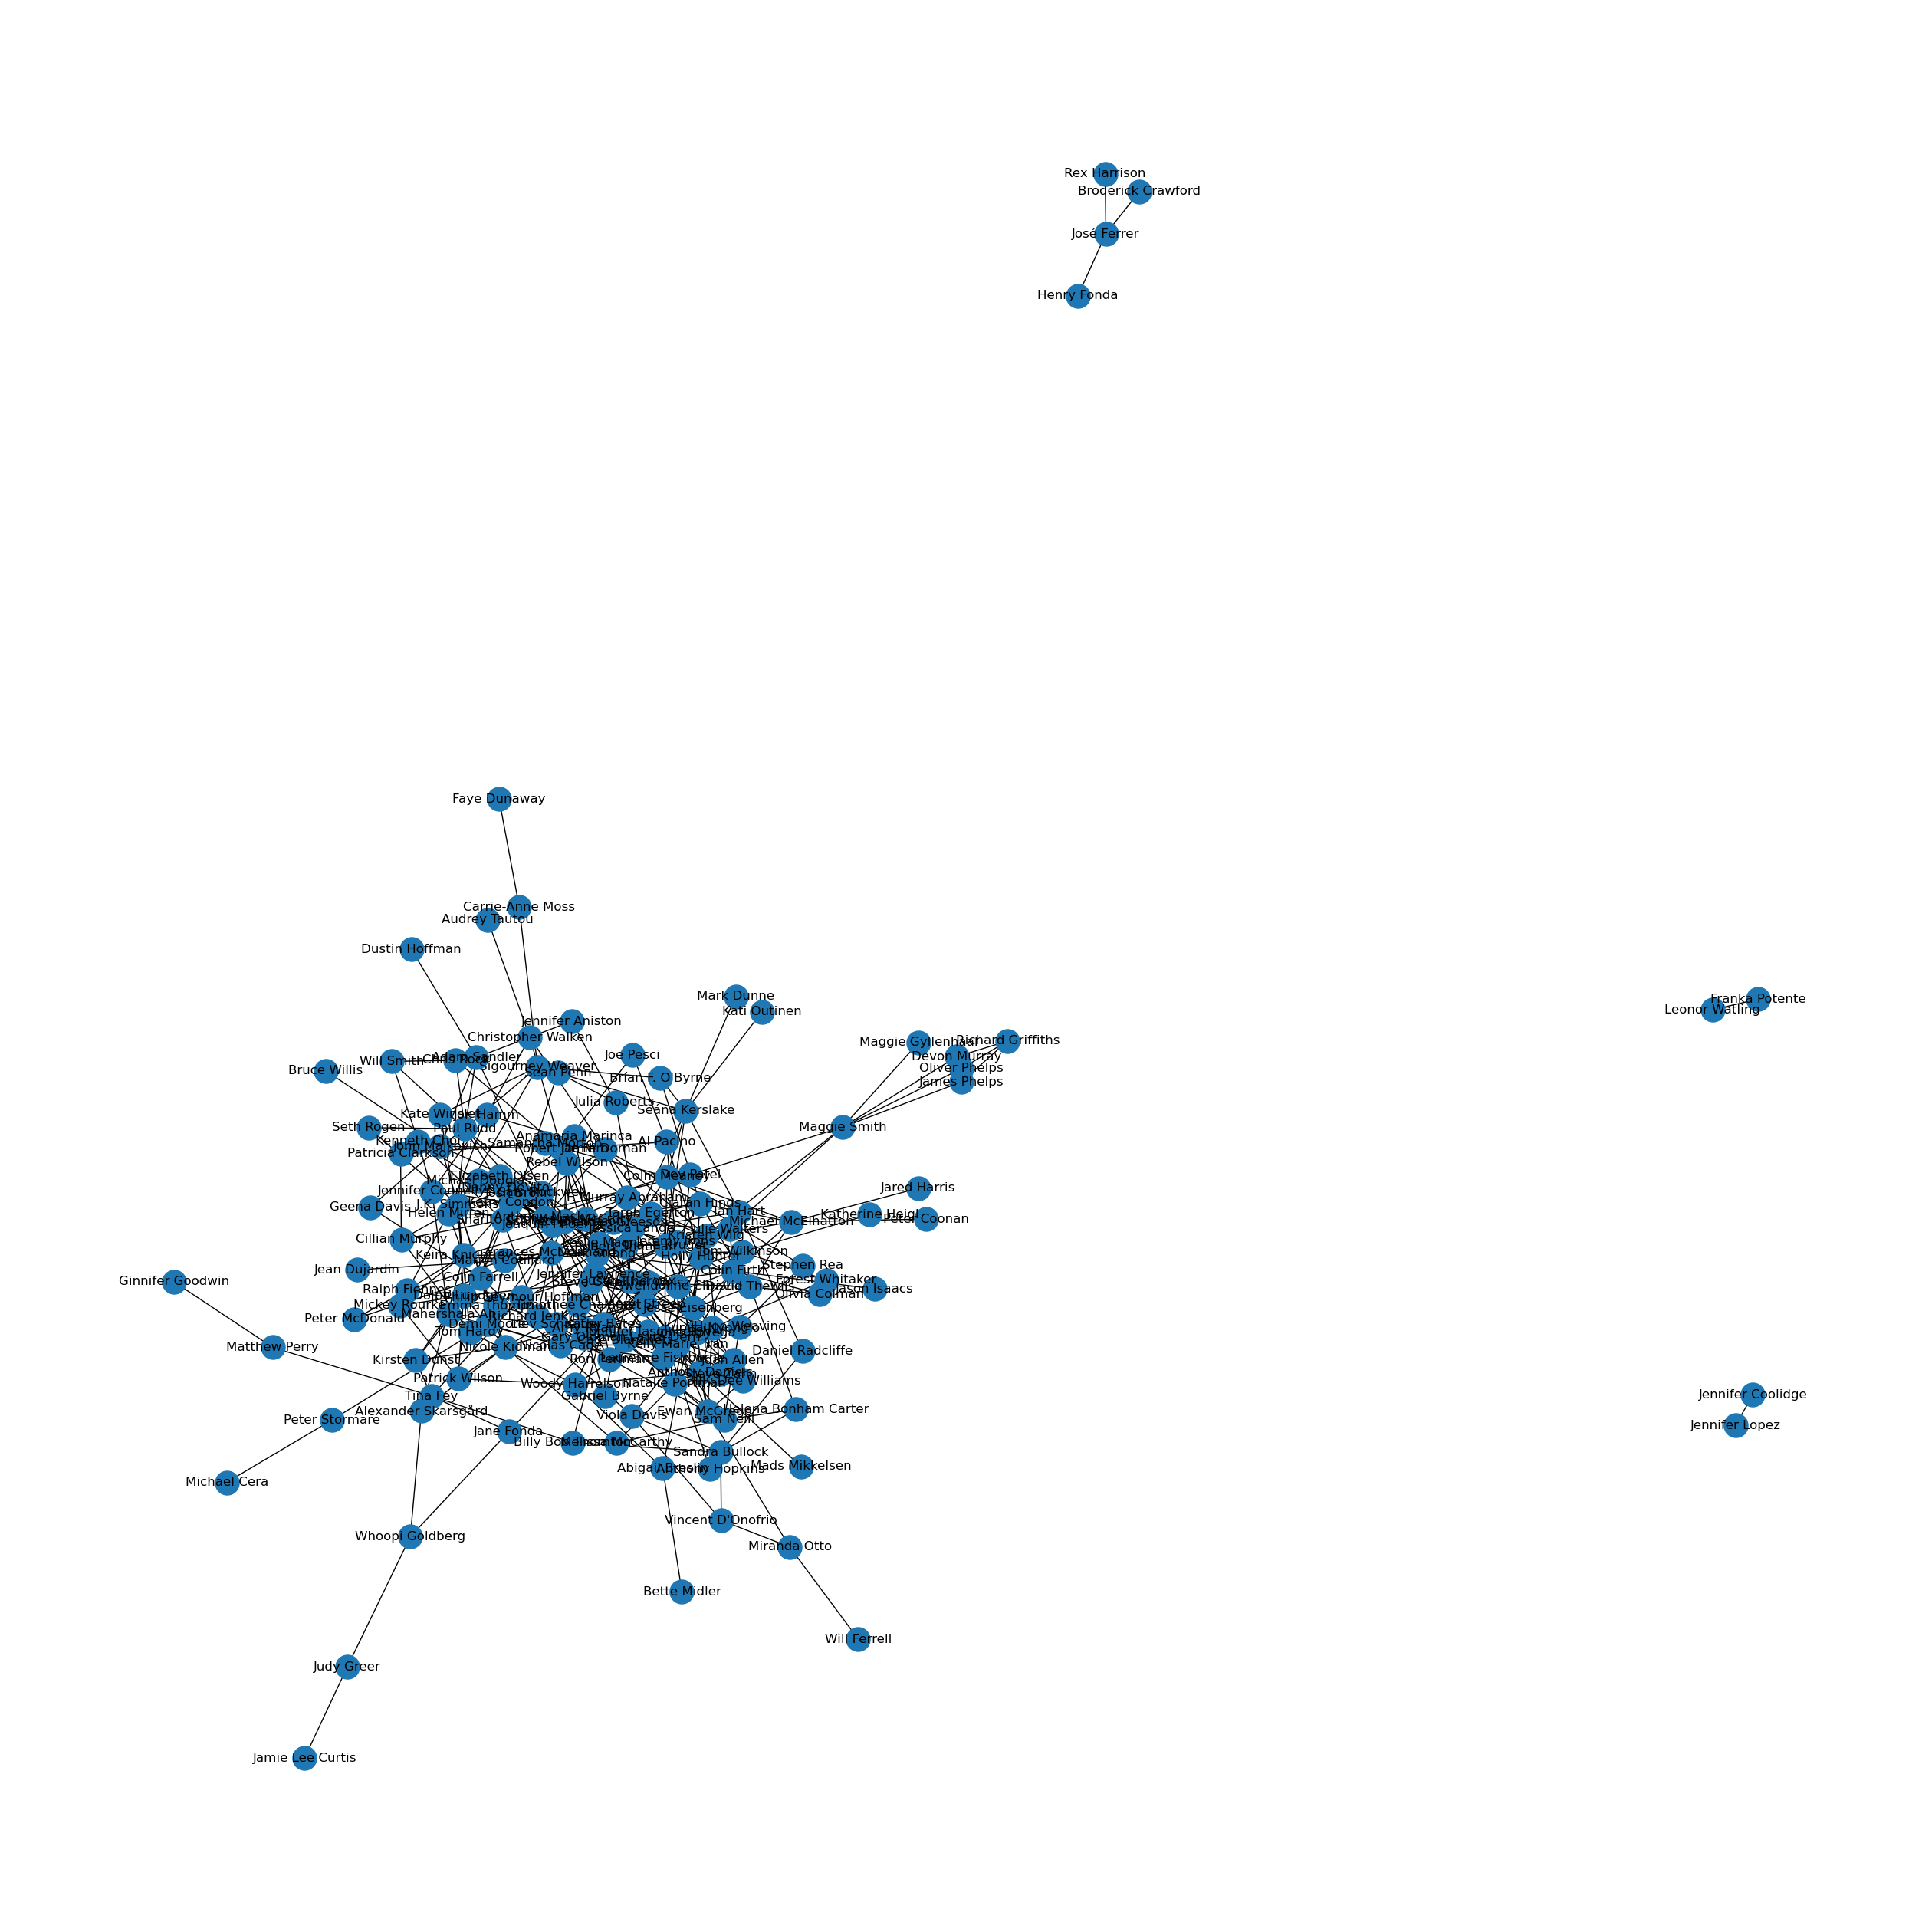

In [28]:
#Network 1
plt.figure(figsize=(25,25))
nx.draw(g_1, with_labels=True, node_size=500)
plt.show()

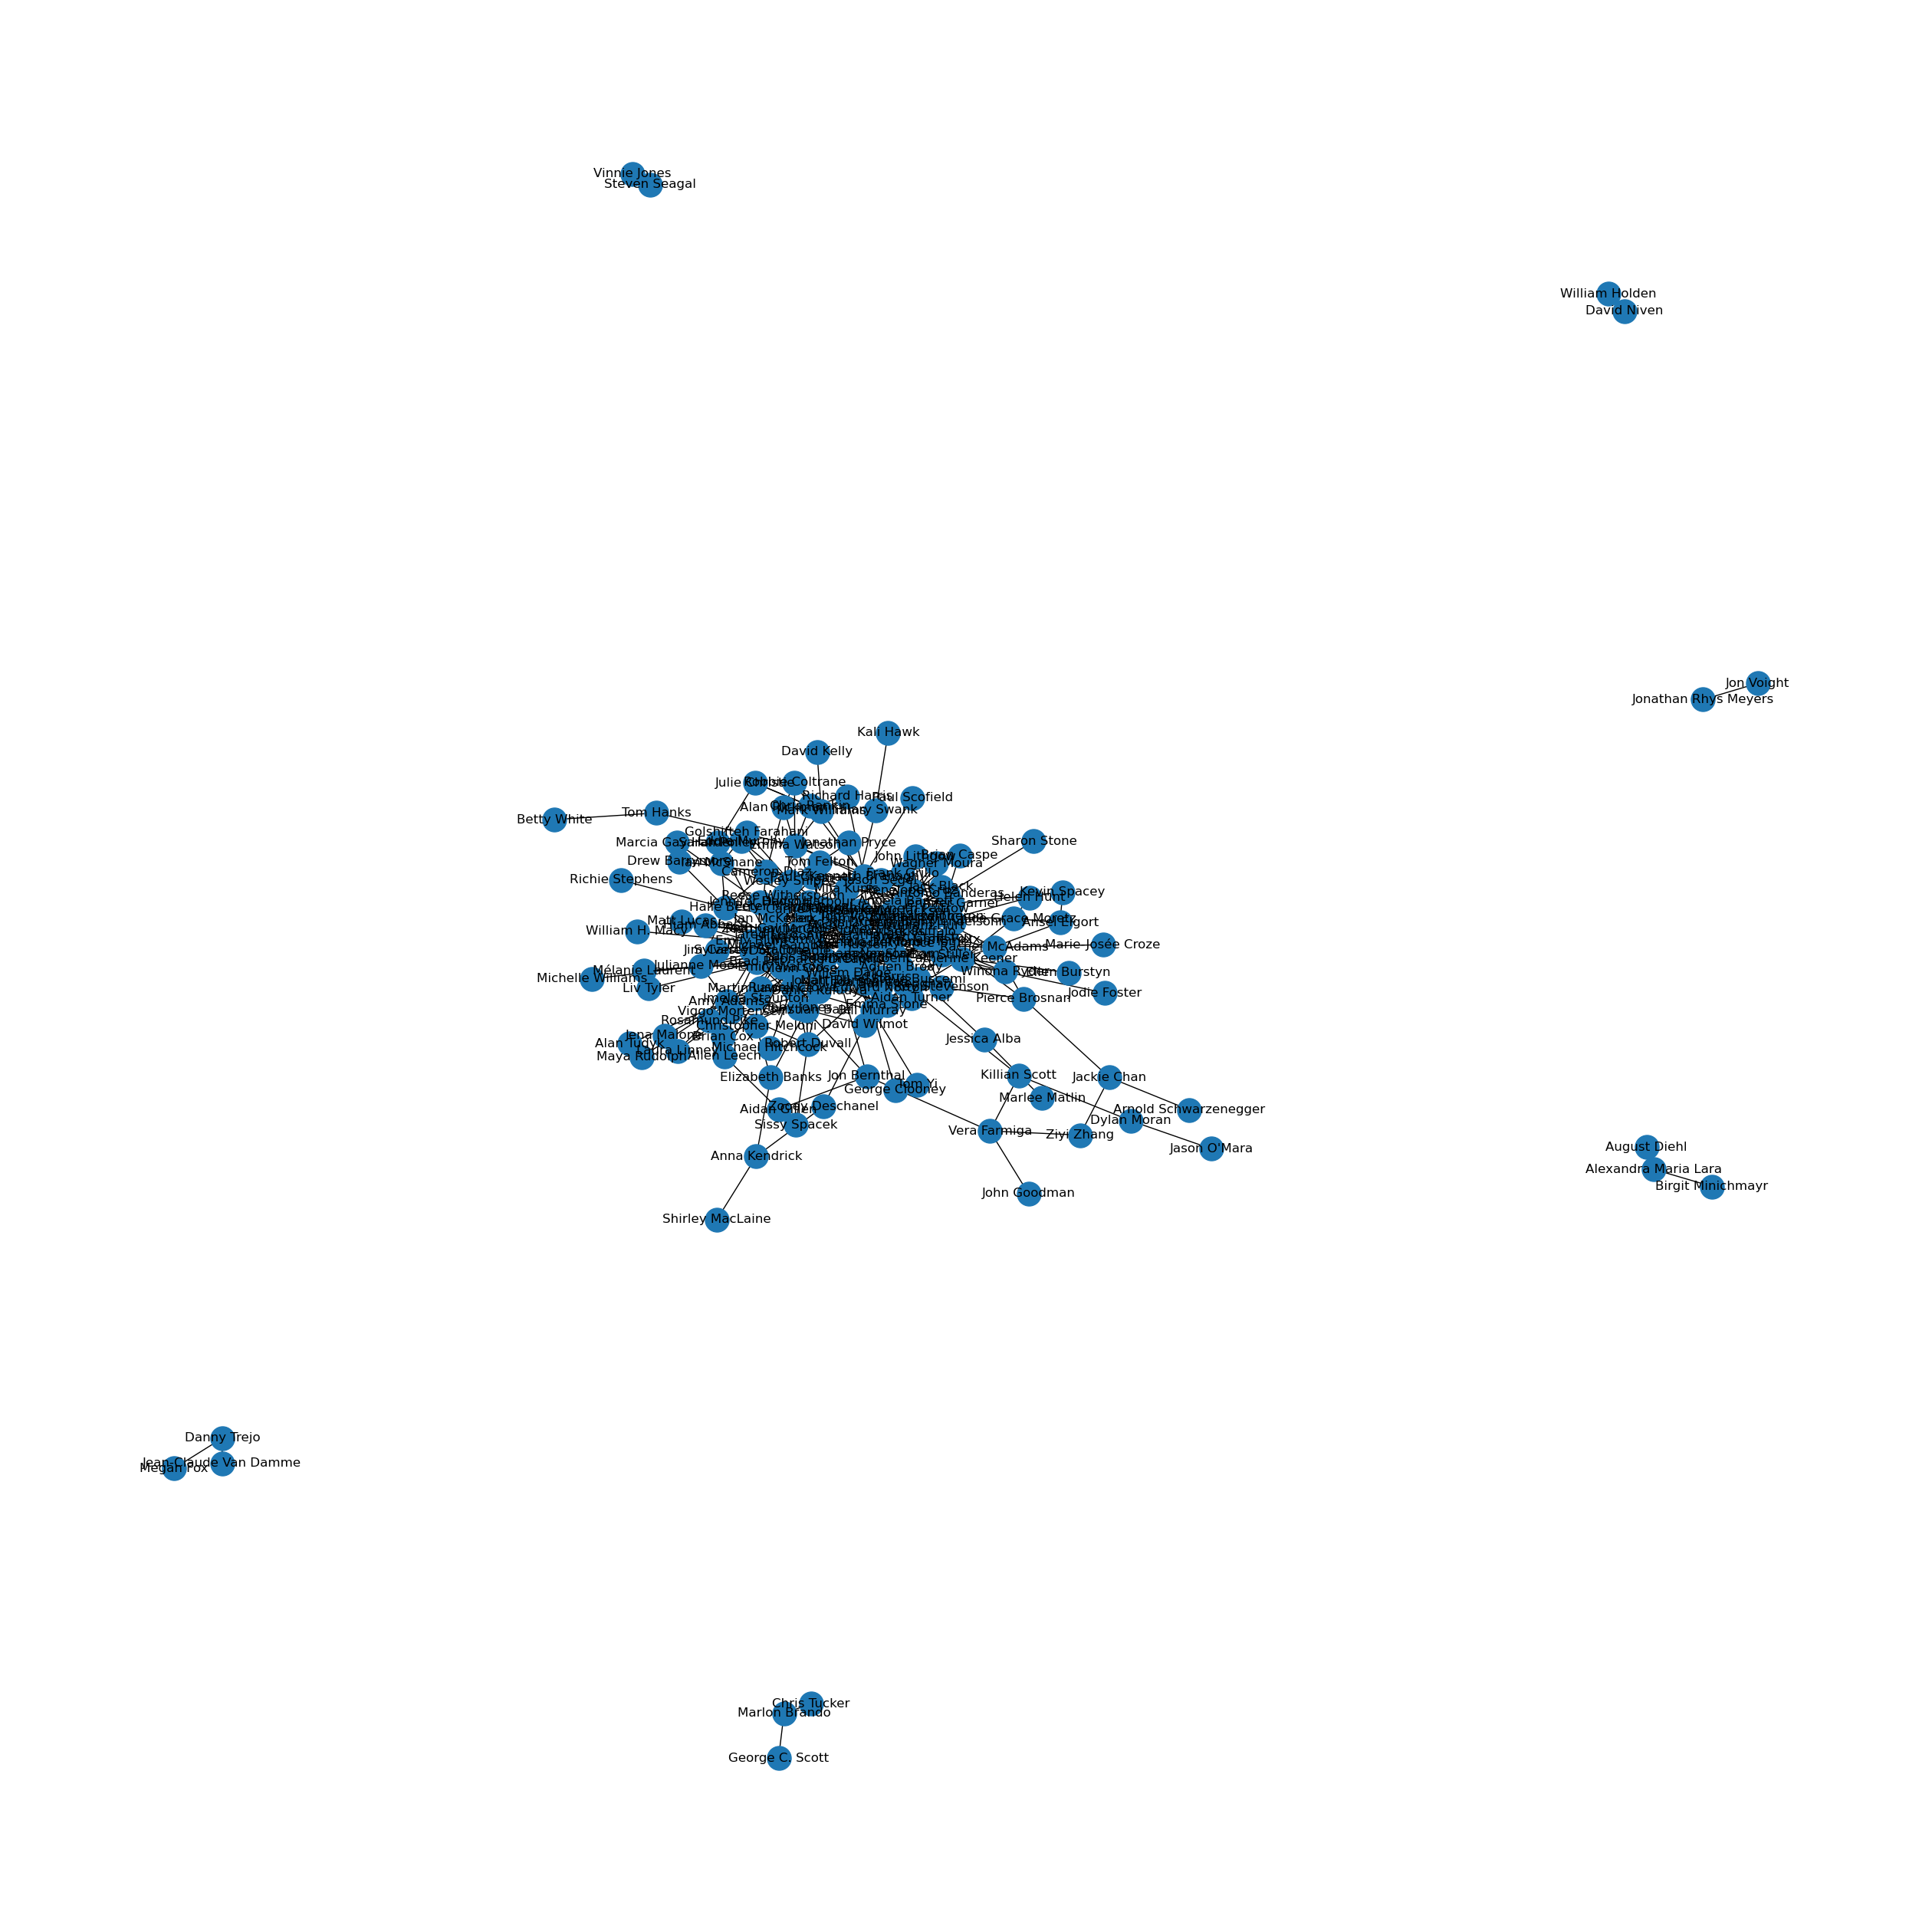

In [29]:
#Network 2
plt.figure(figsize=(25,25))
nx.draw(g_2, with_labels=True, node_size=500)
plt.show()

As you can see, it is currently very difficult to tell which actors have costar relationships. After applying some centrality measures and filtering, we will be able to visualize these network graphs in a much more appealing way.

### Co-Star Relationships Ranked

In order to identify the co-star relationships in each network with the most movies costarred in, we will load each network into a pandas dataframe and sort by edge-weight. 

In [30]:
#Network 1
df_costars_n1 = nx.to_pandas_edgelist(g_1) #Loading networkx network into pandas dataframe
df_costars_n1.columns = ['Actor 1', 'Actor 2', 'Costarred Movies'] #Adding column titles for better presentation
df_costars_n1.sort_values(by="Costarred Movies", ascending=False).head(10)

,Actor 1,Actor 2,Costarred Movies
165,James Phelps,Oliver Phelps,7
233,Devon Murray,Oliver Phelps,5
186,Philip Seymour Hoffman,Jennifer Lawrence,3
288,Elizabeth Olsen,Josh Brolin,3
112,Kelly Marie Tran,Anthony Daniels,3
80,Ron Perlman,Cate Blanchett,3
211,Liev Schreiber,Timothée Chalamet,3
352,Julie Walters,Colin Firth,3
163,James Phelps,Devon Murray,3
227,Tom Hardy,Woody Harrelson,2


In [32]:
#Network 2
df_costars_n2 = nx.to_pandas_edgelist(g_2) #Loading networkx network into pandas dataframe
df_costars_n2.columns = ['Actor 1', 'Actor 2', 'Costarred Movies'] #Adding column titles for better presentation
df_costars_n2.sort_values(by="Costarred Movies", ascending=False).head(10)

,Actor 1,Actor 2,Costarred Movies
183,Chris Rankin,Mark Williams,6
402,Mark Hamill,Peter Mayhew,4
404,Mark Hamill,Carrie Fisher,4
211,Harrison Ford,Mark Hamill,3
348,Reese Witherspoon,Matthew McConaughey,3
412,Gwyneth Paltrow,Chris Evans,3
421,Peter Mayhew,Carrie Fisher,3
157,Adam Driver,Daisy Ridley,3
189,Kurt Russell,Jason Statham,3
22,William Hurt,Chris Evans,3


### Network Density

{'Keira Knightley': 9,
 'Sigourney Weaver': 6,
 'Jamie Lee Curtis': 1,
 'Al Pacino': 4,
 'Danny DeVito': 5,
 'Viola Davis': 4,
 'Brendan Gleeson': 6,
 'Ralph Fiennes': 4,
 'Gabriel Byrne': 2,
 'Helen McCrory': 5,
 'Sam Rockwell': 12,
 'Colin Farrell': 9,
 'Olivia Colman': 2,
 'Paul Rudd': 10,
 'Kati Outinen': 1,
 'Richard Griffiths': 3,
 'Ron Perlman': 8,
 'Billy Dee Williams': 5,
 'Franka Potente': 1,
 'Alexander Skarsgård': 3,
 'Colm Meaney': 7,
 'Mickey Rourke': 4,
 'Gary Oldman': 4,
 'Kelly Marie Tran': 10,
 'Peter McDonald': 2,
 'Will Smith': 3,
 'Meryl Streep': 11,
 'Sharlto Copley': 6,
 'Mahershala Ali': 4,
 'Jane Fonda': 3,
 'Anthony Mackie': 11,
 'Rachel Weisz': 8,
 'Dev Patel': 3,
 'Kathy Bates': 7,
 'Sandra Bullock': 5,
 'James Phelps': 4,
 'Steve Zahn': 2,
 'Matthew Perry': 2,
 'Robert De Niro': 10,
 'Whoopi Goldberg': 3,
 'Bruce Willis': 1,
 'Jamie Dornan': 8,
 'Philip Seymour Hoffman': 3,
 'Scarlett Johansson': 14,
 'Gwendoline Christie': 10,
 "Brían F. O'Byrne": 3,
 'Mad

### Network Degrees

### What Was Found:

## (Task 3) Network Thresholding

## (Task 4) Ego-Centric Analysis

## (Task 5) Network Visualisation